## Apprentissage par la méthode des k plus proches voisins ##

#### EXERCICE 1 : Manipulation de la base de données ####

In [18]:
# #Charger le jeu de données MNIST
from sklearn.datasets import fetch_openml 
mnist = fetch_openml('mnist_784', as_frame=False)

##### Prise en main des différentes commandes

In [5]:
#print(mnist)  #commande qui affiche l'ensemble du dataset en mode verbose (mnist.data et mnist.target)

#print (mnist.data) #affiche seulement les data (dont targets)

#print (mnist.target) #affiche les numéros trouvés

print(len(mnist.data)) #affiche les tailles des matrices

#help(len)     
#print (mnist.data.shape) 
#print (mnist.target.shape) 

#mnist.data[0] 

#mnist.data[0][1]

#mnist.data[:,1] 

#mnist.data[:100]


70000


##### Afficher la classe de l’image 0

Image 0 :  5


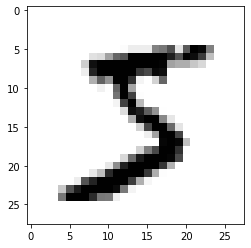

In [6]:
print("Image 0 : ", mnist.target[0])
import matplotlib.pyplot as plt 
images = mnist.data.reshape((-1, 28, 28)) 
plt.imshow(images[0], cmap=plt.cm.gray_r,interpolation="nearest") 
plt.show()

#### EXERCICE 2 : La méthode des k-nn ###

In [19]:
# Librairies
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.neighbors import DistanceMetric
from sklearn.metrics import precision_score

Echantillonage des données

In [20]:
index = np.random.randint(70000, size=7000)
data = mnist.data[index]
target = mnist.target[index]

In [9]:
#On divise la base à 80% pour l'apprentissage et 20% tests
pourcentage_de_données = 0.8

xtrain,  xtest,  ytrain,  ytest = train_test_split(data, target, train_size = pourcentage_de_données)

In [10]:
#Entrainer un classifieur k-nn avec k = 10 sur le jeu de données chargé
clf = KNeighborsClassifier (n_neighbors=10)
clf.fit(xtrain, ytrain)
clf.predict(xtest)
print("Score :", clf.score(xtest, ytest))


Score : 0.935


Actual :  2
Prediction :  ['2']


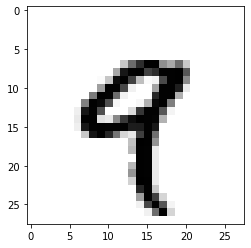

In [11]:
# Afficher la classe de l’image 4 et sa classe prédite

print("Actual : ", target[4])
print("Prediction : ", clf.predict([data[4]]))
import matplotlib.pyplot as plt 
images = mnist.data.reshape((-1, 28, 28)) 
plt.imshow(images[4], cmap=plt.cm.gray_r,interpolation="nearest") 
plt.show()

### Analyse

#### Comparaison du nombre de k voisins

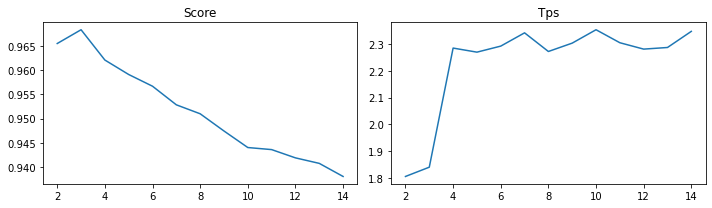

In [13]:
scores = []
times = []
axis_x = []
for k in range(2,15) :
    start=time.time()
    clf = KNeighborsClassifier (n_neighbors = k).fit(xtrain, ytrain)
    clf.predict(data)
    score = clf.score(data, target)
    end=time.time()
    
    tps = end-start
    axis_x.append(k)
    times.append(tps)
    scores.append(score)
    
fig, ax = plt.subplots(1,2,figsize=(10,3))
ax[0].plot(axis_x, scores) 
ax[0].set_title('Score') 

ax[1].plot(axis_x, times) 
ax[1].set_title('Tps') 

    
plt.tight_layout()
plt.show()


#### Comparaison du pourcentage des échantillons (training et test)

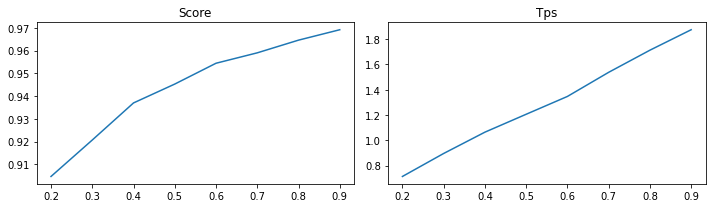

In [14]:
scores = []
times = []

pourcentages = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for p in pourcentages :
    start = time.time()
    xtrain,  xtest,  ytrain,  ytest = train_test_split(data, target, train_size = p)
    clf = KNeighborsClassifier (n_neighbors = 3).fit(xtrain, ytrain)
    clf.predict(data)
    score = clf.score(data, target)
    end=time.time()
    
    tps = end-start
    times.append(tps)
    scores.append(score)
    
fig, ax = plt.subplots(1,2,figsize=(10,3))
ax[0].plot(pourcentages, scores) 
ax[0].set_title('Score') 

ax[1].plot(pourcentages, times) 
ax[1].set_title('Tps') 

    
plt.tight_layout()
plt.show()

#### Comparaison de la taille de l'échantillon training

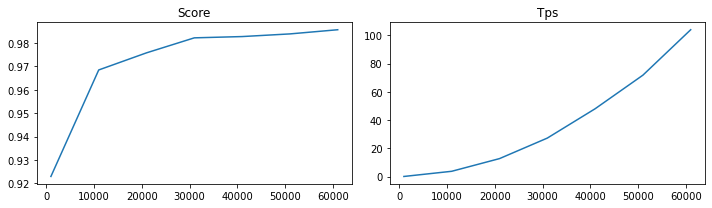

In [15]:
scores = []
times = []

tailles = range(1000, 70000, 10000) 
for taille in tailles :
    
    index_t = np.random.randint(70000, size = taille)
    data_t = mnist.data[index_t]
    target_t = mnist.target[index_t]
    
    start=time.time()
    xtrain,  xtest,  ytrain,  ytest = train_test_split(data_t, target_t, train_size = 0.8)
    clf = KNeighborsClassifier (n_neighbors = 3).fit(xtrain, ytrain)
    clf.predict(data_t)
    score = clf.score(data_t, target_t)
    end=time.time()
    
    tps = end-start
    times.append(tps)
    scores.append(score)
    
fig, ax = plt.subplots(1,2,figsize=(10,3))
ax[0].plot(tailles, scores) 
ax[0].set_title('Score') 

ax[1].plot(tailles, times) 
ax[1].set_title('Tps') 

    
plt.tight_layout()
plt.show()

#### Comparaison des n_jobs

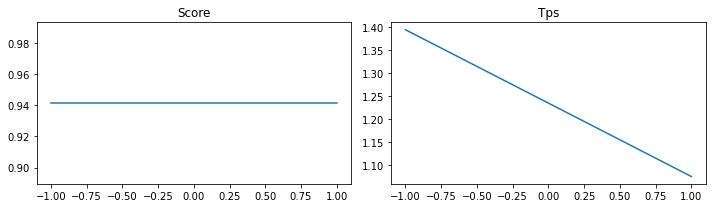

In [29]:
scores = []
times = []

n_job = [1, -1] 
for n in n_job :
    
    start=time.time()
    clf = KNeighborsClassifier (n_neighbors = 3, n_jobs = n).fit(xtrain, ytrain)
    clf.predict(data)
    score = clf.score(xtest, ytest)
    end=time.time()
    
    tps = end-start
    times.append(tps)
    scores.append(score)
    
fig, ax = plt.subplots(1,2,figsize=(10,3))
ax[0].plot(n_job, scores) 
ax[0].set_title('Score') 

ax[1].plot(n_job, times) 
ax[1].set_title('Tps') 

    
plt.tight_layout()
plt.show()

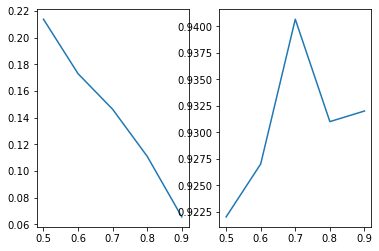

'for i in range(2,15) :\n    temps=0\n    points=0\n    kf = KFold(n_splits=10, shuffle=True)\n    for train_index, test_index in kf.split(data):\n        start=time.time()\n        clf = KNeighborsClassifier (n_neighbors=i, n_jobs=1)\n        #calculer la diff entre n_jobs=-1(all processors) et n_jobs=1( ou none)\n        clf.fit(data[train_index], target[train_index])\n        clf.predict(data[test_index])\n        #print(f"Nombre de voisins: {i}, score : {clf.score(data[test_index], target[test_index])}")\n        end=time.time()\n        #print(f"temps= {end-start}")\n        temps+=end-start\n        points+=clf.score(data[test_index], target[test_index])\n    print(f"average score: {points/50}, average time: {temps/50}")'

In [4]:
temps=[]
points=[]
for i in [0.5, 0.6, 0.7, 0.8, 0.9]:

    xtrain,  xtest,  ytrain,  ytest  =  train_test_split(data,  target, train_size=i)
    start=time.time()
    clf = KNeighborsClassifier (n_neighbors=3)
    clf.fit(xtrain, ytrain)
    clf.predict(xtest)
    end=time.time()
    temps.append(end-start)
    points.append(clf.score(xtest, ytest))

plt.figure(1)
plt.subplot(1,2,1)
plt.plot([0.5, 0.6, 0.7, 0.8, 0.9], temps)
plt.subplot(1,2,2)
plt.plot([0.5, 0.6, 0.7, 0.8, 0.9], points)
plt.show()
#On affiche la classe de l'image 4 et sa classe prédite
#print(target[4])
#print(clf.predict([data[4]]))

#Affichage du score de l'échantillon de test
#print(clf.score(xtest, ytest))
                
#Taux d'erreur 
#print(clf.score(xtrain, ytrain))

#Recherche du k optimal
for i in range(2,15) :
    temps=0
    points=0
    kf = KFold(n_splits=10, shuffle=True)
    for train_index, test_index in kf.split(data):
        start=time.time()
        clf = KNeighborsClassifier (n_neighbors=i, n_jobs=1)
        #calculer la diff entre n_jobs=-1(all processors) et n_jobs=1( ou none)
        clf.fit(data[train_index], target[train_index])
        clf.predict(data[test_index])
        #print(f"Nombre de voisins: {i}, score : {clf.score(data[test_index], target[test_index])}")
        end=time.time()
        #print(f"temps= {end-start}")
        temps+=end-start
        points+=clf.score(data[test_index], target[test_index])
    print(f"average score: {points/50}, average time: {temps/50}")
#Chebychev < Manhattan < Euclidienne

#resultat theorique : en parallele plus rapide, mais induit un cout fixe
